In [5]:
from sklearn.datasets import load_digits

In [11]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [49]:
n_samples, n_features = digits.data.shape
print(n_samples, n_features)

1797 64
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [25]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [29]:
print(digits.target)

[0 1 2 ... 8 9 8]


In [31]:
print("Shape of an item: ", digits.data[0].shape)
print("Data type of an item: ", type(digits.data[0]))
print("Shape of an item: ", digits.images[0].shape)
print("Data tpye of an item: ", type(digits.images[0]))

Shape of an item:  (64,)
Data type of an item:  <class 'numpy.ndarray'>
Shape of an item:  (8, 8)
Data tpye of an item:  <class 'numpy.ndarray'>


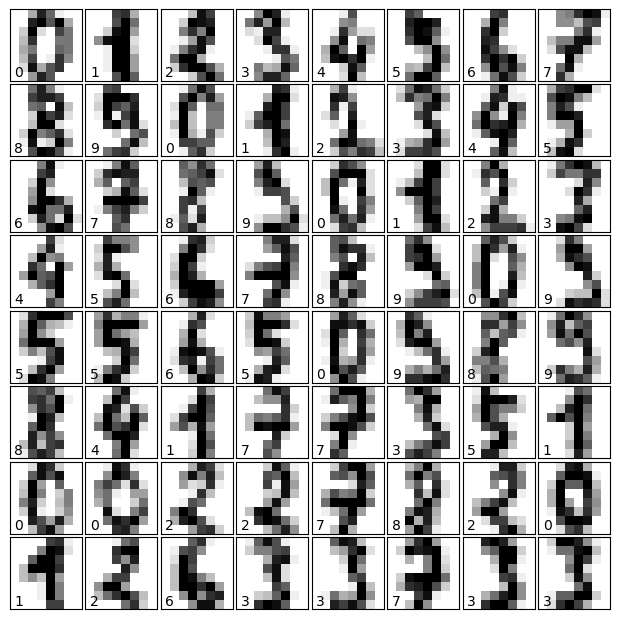

In [33]:
# visualisation of the digits data set
import matplotlib.pyplot as plt
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [76]:
from sklearn import datasets
wine = datasets.load_wine()
# print(wine.DESCR)

In [112]:
print(wine.keys())
print(len(wine.target))

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
178


In [47]:
print(wine.target_names)
print(wine.feature_names)

['class_0' 'class_1' 'class_2']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [78]:
data = wine.data


0
1
2


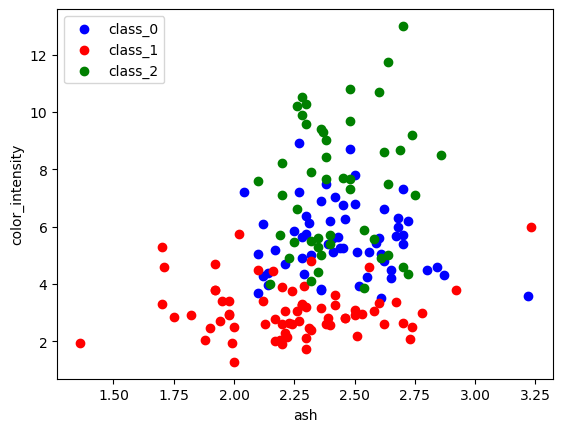

In [80]:
from sklearn import datasets
import matplotlib.pyplot as plt

wine = datasets.load_wine()

features = 'ash', 'color_intensity'
features_index = [wine.feature_names.index(features[0]),
                  wine.feature_names.index(features[1])]


colors = ['blue', 'red', 'green']

for label, color in zip(range(len(wine.target_names)), colors):
    print(label)
    plt.scatter(wine.data[wine.target==label, features_index[0]], 
                wine.data[wine.target==label, features_index[1]],
                label=wine.target_names[label],
                c=color)

plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend(loc='upper left')
plt.show() # wine dataset scatter plot

In [59]:
print(features_index)
print()

[2, 9]


In [90]:
print(wine.data[wine.target==1, 1])

[0.94 1.1  1.36 1.25 1.13 1.45 1.21 1.01 1.17 0.94 1.19 1.61 1.51 1.66
 1.67 1.09 1.88 0.9  2.89 0.99 3.87 0.92 1.81 1.13 3.86 0.89 0.98 1.61
 1.67 2.06 1.33 1.83 1.51 1.53 2.83 1.99 1.52 2.12 1.41 1.07 3.17 2.08
 1.34 2.45 1.72 1.73 2.55 1.73 1.75 1.29 1.35 3.74 2.43 2.68 0.74 1.39
 1.51 1.47 1.61 3.43 3.43 2.4  2.05 4.43 5.8  4.31 2.16 1.53 2.13 1.63
 4.3 ]


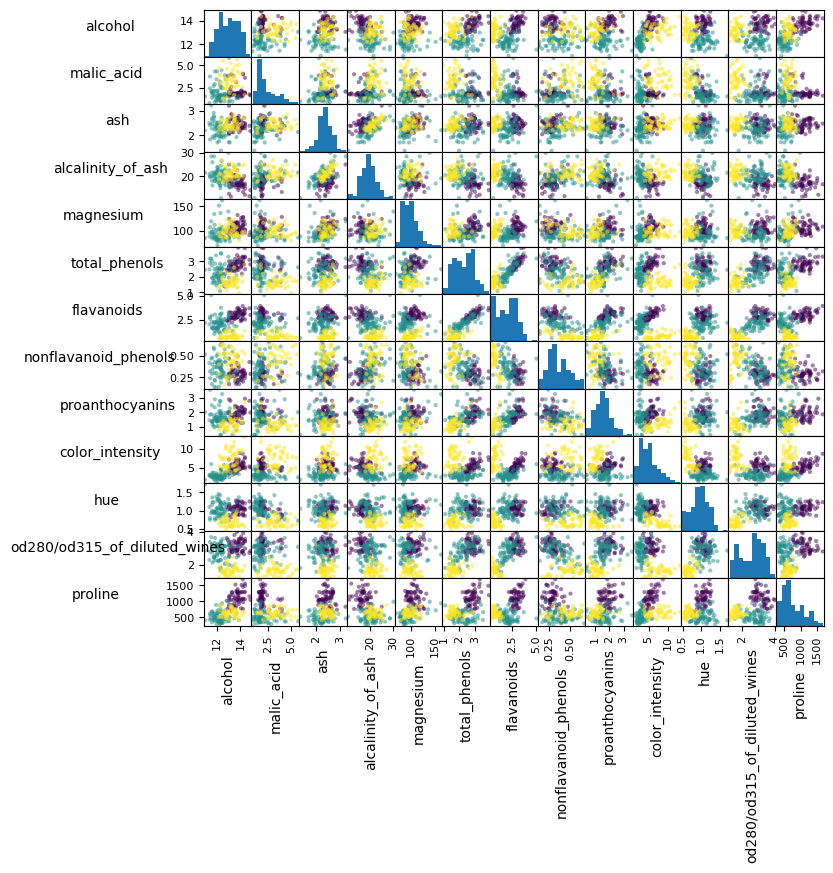

In [82]:
# scatter matrix of wine data set
import pandas as pd
from sklearn import datasets

wine = datasets.load_wine()
def rotate_labels(df, axes):
    """ changing the rotation of the label output, 
    y labels horizontal and x labels vertical """
    n = len(df.columns)
    for x in range(n):
        for y in range(n):
            # to get the axis of subplotsÍ
            ax = axs[x, y]
            # to make x axis name vertical  
            ax.xaxis.label.set_rotation(90)
            # to make y axis name horizontal 
            ax.yaxis.label.set_rotation(0)
            # to make sure y axis names are outside the plot area
            ax.yaxis.labelpad = 50

wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
axs = pd.plotting.scatter_matrix(wine_df, 
                                 c=wine.target, 
                                 figsize=(8, 8),
                                );

rotate_labels(wine_df, axs)

In [116]:
import numpy as np

# Suppose wine.data is a numpy array of shape (n_samples, n_features)
wine_data = np.array([[1, 2, 3],
                      [4, 5, 6],
                      [7, 8, 9]])

# Suppose wine.target is a numpy array of shape (n_samples,) representing labels
wine_target = np.array([0, 1, 0])

label = 0
features_index = [1]  # Select the second feature column
print(features_index)

# Select the values from the second feature column where wine_target is equal to label
selected_values = wine_data[wine_target == label, features_index[0]]

print(selected_values)

[1]
[2 8]
